In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedabady01","key":"3dfd91e3f622c5c216982607d0332039"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/



In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          17067        492  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           4538        109  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1048         32  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [ ]:
! kaggle datasets download -d emotion-detection-fer

 77% 50.0M/65.2M [00:00<00:00, 125MB/s]
100% 65.2M/65.2M [00:00<00:00, 151MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip emotion-detection-fer.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

# Import libarirs 

In [ ]:
import numpy as np
import pandas as   pd 
import os
import glob as gb  
import matplotlib.pyplot as plt
import cv2

from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder


import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Open Folders

In [ ]:
train_path='/content/train/'
test_path='/content/test/'

In [ ]:
total = 0 
classes = 0
for  folder in os.listdir(train_path):
    files =  gb.glob(pathname=str(train_path +folder+'//*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')
    total  = len(files)+total
    classes=1+classes
    
    
print(f'we have {(total)} items in train data and we have {classes} classes') 

For training data , found 4830 in folder sad
For training data , found 4097 in folder fearful
For training data , found 7215 in folder happy
For training data , found 4965 in folder neutral
For training data , found 3995 in folder angry
For training data , found 3171 in folder surprised
For training data , found 436 in folder disgusted
we have 28709 items in train data and we have 7 classes


In [ ]:
tes_classes=0
tes_total=0
for  folder in os.listdir(test_path):
    files =  gb.glob(pathname=str(test_path +folder+'//*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')
    tes_total  = len(files)+tes_total
    tes_classes=1+tes_classes

    
print(f'we have {(tes_total)} items in test data and we have {tes_classes} classes') 

For training data , found 1247 in folder sad
For training data , found 1024 in folder fearful
For training data , found 1774 in folder happy
For training data , found 1233 in folder neutral
For training data , found 958 in folder angry
For training data , found 831 in folder surprised
For training data , found 111 in folder disgusted
we have 7178 items in test data and we have 7 classes


So  we  notice that we have 7 classes **

# Change the size
first we gonna check  the size of the data


In [ ]:
size = []
for  folder in os.listdir(train_path):
    files =  gb.glob(pathname=str(train_path +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        size.append(img.shape)

        
pd.Series(size).value_counts()

(48, 48, 3)    28709
dtype: int64

In [ ]:
size = []
for  folder in os.listdir(test_path):
    files =  gb.glob(pathname=str(test_path +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        size.append(img.shape)

        
pd.Series(size).value_counts()

(48, 48, 3)    7178
dtype: int64

**since all the  data has the same size  we  don't have to change it**

#  Reading Images

now it's time to read all images & convert it into array And normlize it 

In [ ]:
X_train = []
y_train = []
for  folder in os.listdir(train_path):
    files =  gb.glob(pathname=str(train_path +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        X_train.append(list(img))
        y_train.append(folder)

In [ ]:
print(f'we have {len(X_train)} items in X_train') 

we have 28709 items in X_train


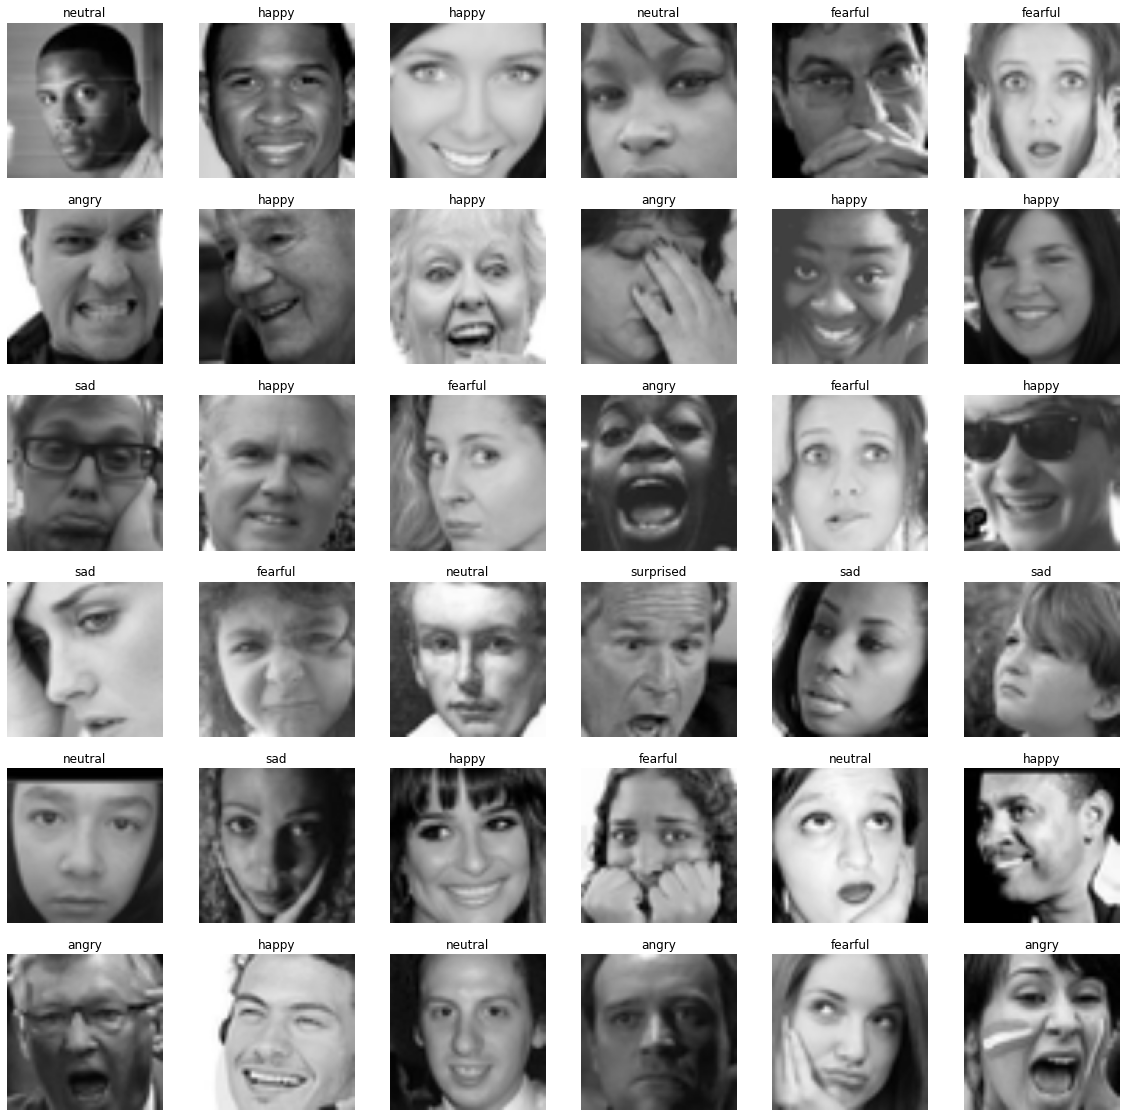

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(y_train[i])

In [ ]:
X_test = []
y_test = []
for  folder in os.listdir(test_path):
    files =  gb.glob(pathname=str(test_path +folder+'//*.png'))
    for file in files:
        img = cv2.imread(file)
        X_test.append(list(img))
        y_test.append(folder)

In [ ]:
print(f'we have {len(X_test)} items in X_test') 

we have 7178 items in X_test


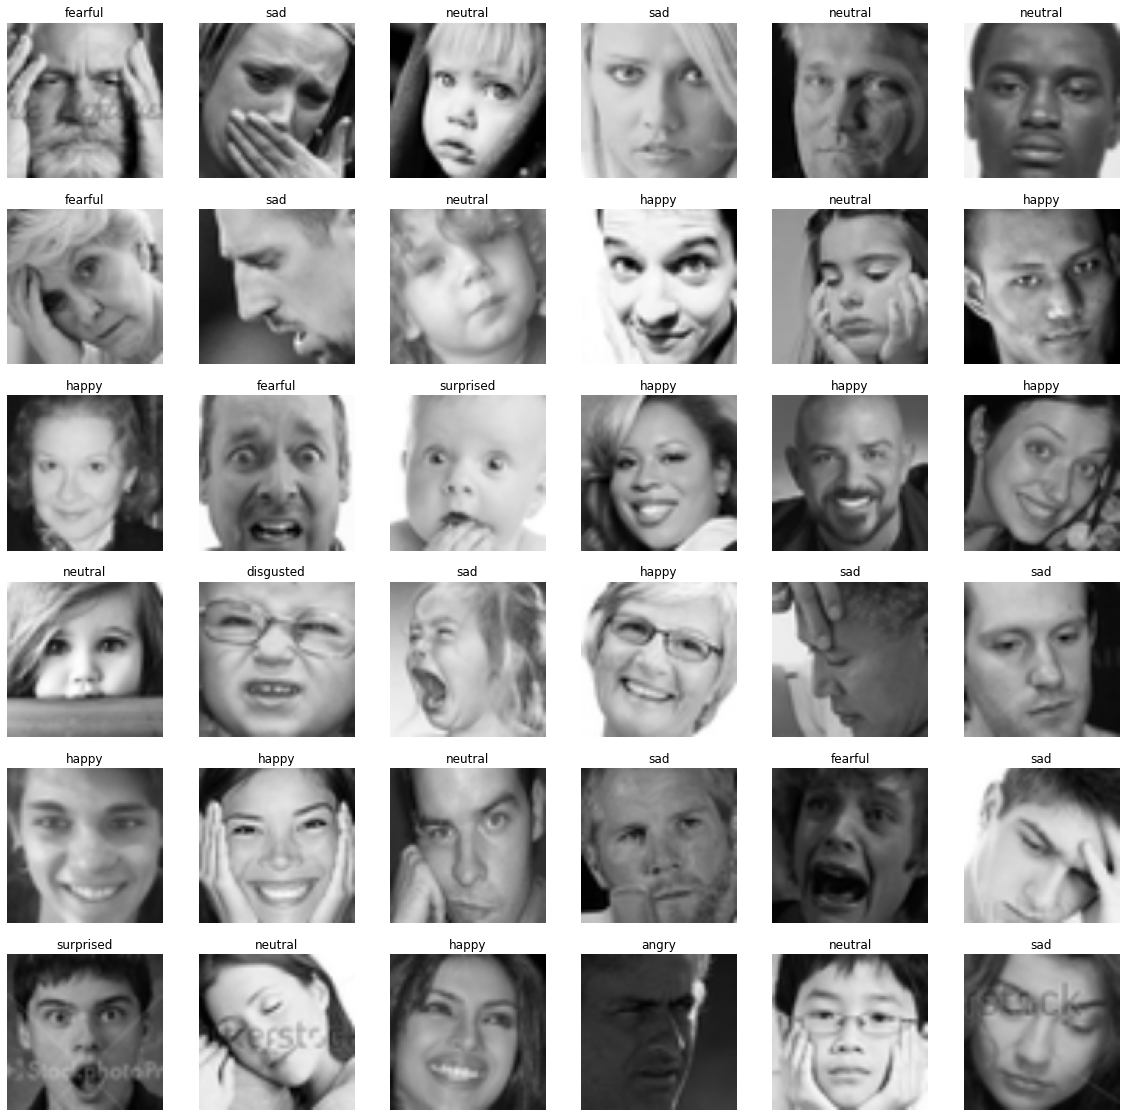

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(y_test[i])

#  Normlization

In [ ]:
#convert to  array and normlize  it
x_train = np.array(X_train) /255.0
x_test = np.array(X_test)/255.0

print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')


X_train shape  is (28709, 48, 48, 3)
X_test shape  is (7178, 48, 48, 3)


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

y_train shape  is (28709,)
y_test shape  is (7178,)


In [ ]:
LE = LabelEncoder()
y_train = to_categorical(LE.fit_transform(y_train))
y_test = to_categorical(LE.fit_transform(y_test))

In [ ]:
y_train.shape


(28709, 7)

# Modling 

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(300,kernel_size=(3,3),activation='relu',input_shape=(48,48,3)),    
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,    
        keras.layers.Dense(32,activation='relu')   ,            
        keras.layers.Dense(7,activation='softmax') ,    
        ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 43, 300)       8400      
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 150)       405150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 150)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 128)       172928    
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                      

In [ ]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs =100
batch=128
CNN = model.fit(x_train, y_train,batch_size=batch, epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
225/225 [==============================] - 43s 141ms/step - loss: 1.8033 - accuracy: 0.2567 - val_loss: 1.7012 - val_accuracy: 0.3364
Epoch 2/100
225/225 [==============================] - 31s 137ms/step - loss: 1.5804 - accuracy: 0.3866 - val_loss: 1.4667 - val_accuracy: 0.4422
Epoch 3/100
225/225 [==============================] - 31s 139ms/step - loss: 1.3761 - accuracy: 0.4715 - val_loss: 1.3152 - val_accuracy: 0.4902
Epoch 4/100
225/225 [==============================] - 31s 138ms/step - loss: 1.2205 - accuracy: 0.5367 - val_loss: 1.2824 - val_accuracy: 0.5071
Epoch 5/100
225/225 [==============================] - 31s 137ms/step - loss: 1.0744 - accuracy: 0.5975 - val_loss: 1.2355 - val_accuracy: 0.5319
Epoch 6/100
225/225 [==============================] - 31s 138ms/step - loss: 0.9121 - accuracy: 0.6614 - val_loss: 1.2906 - val_accuracy: 0.5312
Epoch 7/100
225/225 [==============================] - 31s 138ms/step - loss: 0.7143 - accuracy: 0.7425 - val_loss: 1.4552 -

In [ ]:
loss , acc =model.evaluate(x_test,y_test)

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(CNN.history['accuracy'], color='r')
plt.plot(CNN.history['val_accuracy'], color='b')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

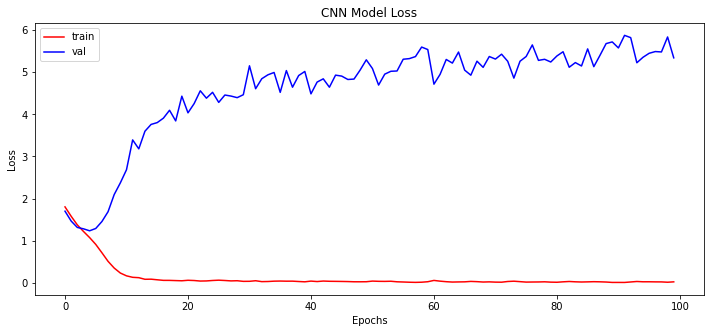

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(CNN.history['loss'], color='r')
plt.plot(CNN.history['val_loss'], color='b')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
y_pred= model.predict(x_test)

225/225 [==============================] - 3s 11ms/step


In [ ]:
y_pred

array([[3.92896309e-03, 7.12106651e-10, 6.38136715e-02, ...,
        3.88276875e-02, 8.93429577e-01, 1.34859879e-09],
       [6.01911006e-06, 2.17071465e-11, 1.05120584e-07, ...,
        9.99993801e-01, 5.19688792e-10, 1.19199058e-07],
       [1.22902952e-10, 1.88357576e-13, 2.38631404e-09, ...,
        2.53060705e-07, 9.99999762e-01, 9.80577685e-12],
       ...,
       [9.99283731e-01, 2.79222476e-08, 7.15996081e-04, ...,
        3.81382738e-11, 6.18569445e-08, 4.73118418e-14],
       [6.78424761e-02, 3.83774546e-04, 2.22085327e-01, ...,
        2.52034835e-04, 7.08174765e-01, 1.26128527e-03],
       [1.80299667e-05, 4.55251429e-05, 9.90135491e-01, ...,
        1.02074619e-03, 1.07795142e-08, 8.76804441e-03]], dtype=float32)

In [ ]:
y_predc = [np.argmax(i) for i in y_pred]

In [ ]:
y_predc

[5,
 4,
 5,
 2,
 4,
 5,
 4,
 5,
 3,
 2,
 3,
 4,
 5,
 5,
 2,
 4,
 5,
 5,
 2,
 5,
 5,
 4,
 4,
 0,
 0,
 4,
 6,
 5,
 2,
 3,
 5,
 5,
 4,
 5,
 0,
 4,
 2,
 5,
 5,
 5,
 4,
 5,
 5,
 2,
 3,
 4,
 3,
 2,
 0,
 3,
 0,
 3,
 0,
 4,
 5,
 0,
 2,
 0,
 4,
 5,
 2,
 6,
 5,
 5,
 5,
 2,
 2,
 4,
 5,
 4,
 5,
 0,
 4,
 5,
 5,
 0,
 2,
 6,
 4,
 3,
 5,
 4,
 3,
 5,
 5,
 5,
 2,
 2,
 5,
 3,
 2,
 4,
 4,
 5,
 5,
 5,
 5,
 0,
 5,
 4,
 0,
 4,
 5,
 5,
 3,
 4,
 4,
 5,
 5,
 3,
 5,
 3,
 2,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 2,
 5,
 4,
 4,
 4,
 5,
 5,
 2,
 0,
 5,
 4,
 5,
 2,
 4,
 4,
 3,
 4,
 4,
 4,
 2,
 3,
 5,
 0,
 4,
 4,
 4,
 5,
 0,
 3,
 2,
 2,
 6,
 2,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 2,
 4,
 5,
 5,
 2,
 3,
 3,
 6,
 5,
 5,
 2,
 6,
 6,
 2,
 5,
 5,
 5,
 5,
 5,
 0,
 2,
 0,
 4,
 5,
 2,
 2,
 5,
 4,
 5,
 5,
 2,
 5,
 5,
 5,
 0,
 2,
 3,
 5,
 0,
 3,
 5,
 0,
 5,
 5,
 5,
 5,
 0,
 2,
 4,
 5,
 4,
 4,
 3,
 5,
 0,
 5,
 4,
 2,
 5,
 3,
 5,
 5,
 2,
 2,
 4,
 5,
 3,
 4,
 5,
 4,
 2,
 5,
 2,
 5,
 2,
 3,
 4,
 2,
 3,
 1,
 5,
 5,
 4,
 2,
 4,
 5,
 5,
 2,
 5,


In [ ]:
def class_report(y_test, y_pred):
    y_predicted_labels = [np.argmax(i) for i in y_pred]
    y_predicted_labels = np.array(y_predicted_labels)
    y_test = np.argmax(y_test, axis=1)
    print(classification_report(y_test, y_predicted_labels))

In [ ]:
class_report(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       958
           1       0.64      0.41      0.50       111
           2       0.33      0.39      0.36      1024
           3       0.70      0.74      0.72      1774
           4       0.47      0.49      0.48      1233
           5       0.38      0.36      0.37      1247
           6       0.73      0.65      0.69       831

    accuracy                           0.52      7178
   macro avg       0.53      0.49      0.50      7178
weighted avg       0.52      0.52      0.52      7178



In [ ]:

y_test = np.argmax(y_test, axis=1)

In [ ]:
y_test

array([5, 5, 5, ..., 1, 1, 1])


1>> sad<br>
2>> fearful<br>
3>> happy<br>
4>>  neutral<br>
5>> angry<br>
6>> surprised<br>
7>> disgusted

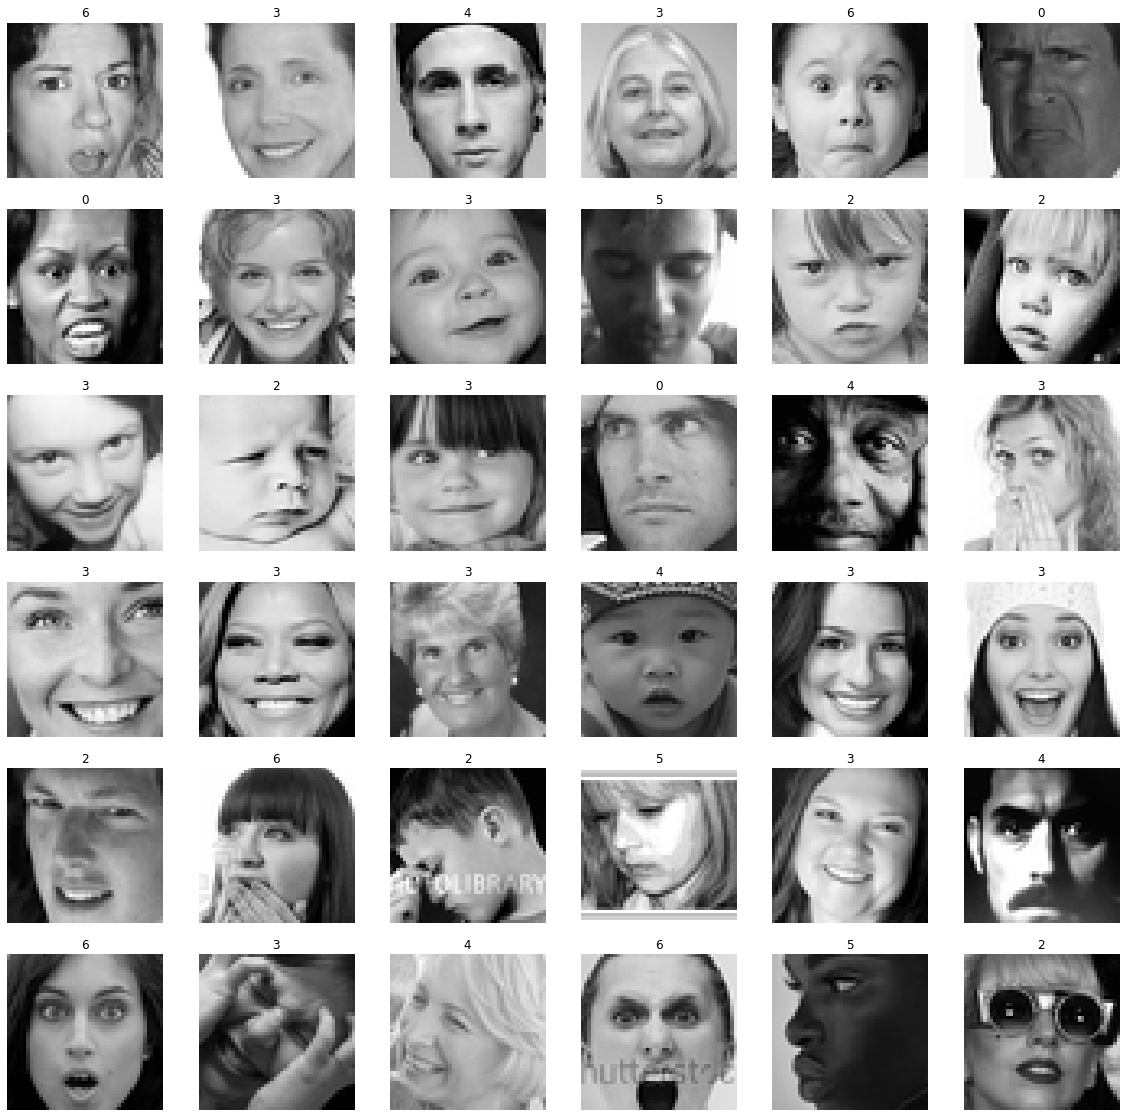

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(y_predc[i])